In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading the required files
frozen_graph = 'F:/opencv/frozen_inference_graph.pb'
config_file = 'F:/opencv/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

# Loading the pre-trained model

model = cv2.dnn_DetectionModel(frozen_graph,config_file)

# Reading the label file

Label = []
with open('label.txt', 'rt') as lbl:
    Label = lbl.read().rstrip('\n').split('\n')
    #label.append(labels)


print(Label)

print(len(Label))



['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


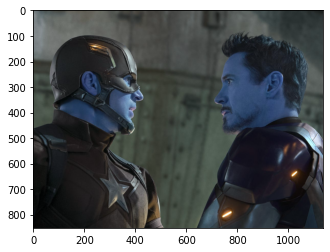

In [2]:
# Object detection in an image 

# Reading an image
img = cv2.imread('F:/opencv/5acd020c689875bc368b4e57.jpg')

# Showing the image
plt.imshow(img); #bgr

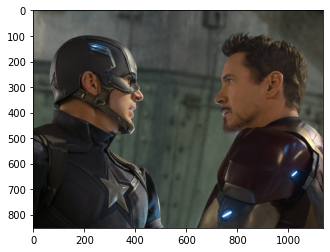

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); # Changing to RGB color format

In [4]:
# Setting the input according to model architecture

model.setInputSize(320,320)
model.setInputScale(1.0/127.5) # 255/2 = 127.5
model.setInputSwapRB(True) # To automatically convert from bgr to RGB
model.setInputMean((127.5,127.5,127.5))

<dnn_Model 000001909749C910>

In [5]:
# Modelling

classindex, confidence, bbox = model.detect(img, confThreshold=0.6)

In [6]:
print(classindex)

[[1]
 [1]]


In [7]:
print(confidence)

[[0.68822736]
 [0.66432613]]


In [8]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

for classind, conf, boxes in zip(classindex.flatten(),confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2) #bgr
    cv2.putText(img,Label[classind-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(0,255,0), thickness=3)

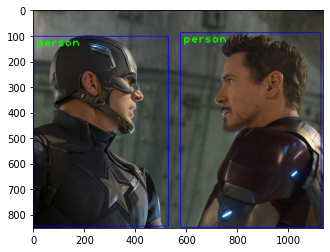

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

## Video detection

In [ ]:
video = cv2.VideoCapture('22.mp4')

video.set(cv2.CAP_PROP_FRAME_WIDTH, 1300)
video.set(cv2.CAP_PROP_FRAME_HEIGHT, 1500)

# Checking if the video is working properly
if not video.isOpened():
    video=cv2.VideoCapture(0)
    raise IOError('Cannot open video')
    
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

while True: 
    ret,frame= video.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.6)
    print(ClassIndex)
    if(len(Label)!=0): #Checking if the labels are present
        for classind, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(), bbox):
            if(len(Label)<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2) #bgr
                cv2.putText(frame,Label[classind-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(0,255,0), thickness=3)
    
    # displaying predictions
    cv2.imshow('Object detection in the video', frame)
    
    ## press q to quit
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# close the video
video.release()
cv2.destroyAllWindows()

## Webcam detection

In [10]:
cap = cv2.VideoCapture(0)

# Checking if the video is working properly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
    raise IOError('Cannot open webcam')
    
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

while True: 
    ret,frame= cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.6)
    print(ClassIndex)
    if(len(Label)!=0): #Checking if the labels are present
        for classind, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(), bbox):
            if(len(Label)<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2) #bgr
                cv2.putText(frame,Label[classind-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(0,255,0), thickness=3)
    
    # displaying predictions
    cv2.imshow('Object detection in the webcam', frame)
    
    ## press q to quit
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# closing the webcam
cap.release()
cv2.destroyAllWindows()

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
()


AttributeError: 'tuple' object has no attribute 'flatten'